The MNIST (Modified National Institute of Standards and Technology) dataset consists of images of handwritten digits that is used for training and testing image processing systems

This is a multiclass classification problem in which the goal is to predict a single discrete label (0,1,2,3,4,5,6,7,8,9)

In [1]:
from keras.datasets import mnist # mnist dataset
from keras import models
from keras import layers
from keras.utils import to_categorical

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

Using TensorFlow backend.


Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

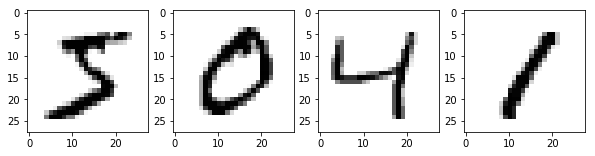

In [6]:
plt.figure(figsize=(10,10))
x, y = 4, 1
for i in range(4):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [7]:
train_labels[:4]

array([5, 0, 4, 1], dtype=uint8)

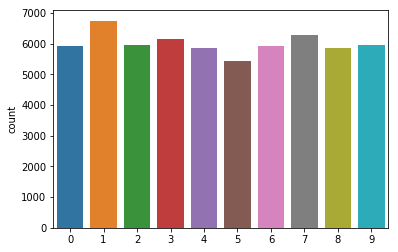

In [8]:
sns.countplot(train_labels)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images.ndim

3

In [11]:
test_images.dtype

dtype('uint8')

Linear model definition

The output of the network is a layer of size 10 with a probability distribution over the 10 different classes

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Compiling the model

The chosen loss function is categorical_crossentropy because is a multiclass classification problem

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Encoding the data

In [14]:
train_images_prepared = train_images.reshape((60000, 28 * 28))
train_images_prepared = train_images_prepared.astype('float32') / 255

test_images_prepared = test_images.reshape((10000, 28 * 28))
test_images_prepared = test_images_prepared.astype('float32') / 255

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Setting a validation set of 6000 samples from 60000 training images

In [16]:
train_images_val = train_images_prepared[:6000]
train_images_partial = train_images_prepared[6000:]

train_labels_val = train_labels_one_hot[:6000]
train_labels_partial = train_labels_one_hot[6000:]

Training the model for 10 epochs or passes over the entire dataset

In [17]:
history = model.fit(train_images_partial, train_labels_partial, epochs=10, batch_size=128, validation_data=(train_images_val, train_labels_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.2714 - acc: 0.9221 - val_loss: 0.1288 - val_acc: 0.9637
Epoch 2/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.1108 - acc: 0.9679 - val_loss: 0.1022 - val_acc: 0.9688
Epoch 3/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.0734 - acc: 0.9775 - val_loss: 0.0778 - val_acc: 0.9768
Epoch 4/10
54000/54000 [==============================] - 6s 107us/step - loss: 0.0529 - acc: 0.9840 - val_loss: 0.0669 - val_acc: 0.9807
Epoch 5/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0669 - val_acc: 0.9795
Epoch 6/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0738 - val_acc: 0.9783
Epoch 7/10
54000/54000 [==============================] - 6s 118us/step - loss: 0.0225 - acc: 0.9936 - val_loss: 0.0615 - val_a

Plotting training and validation loss

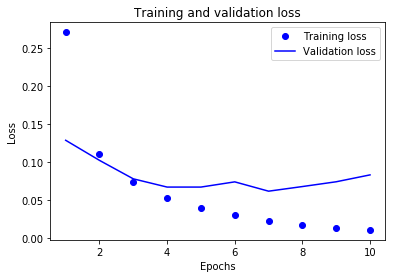

In [18]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting training and validation accuracy

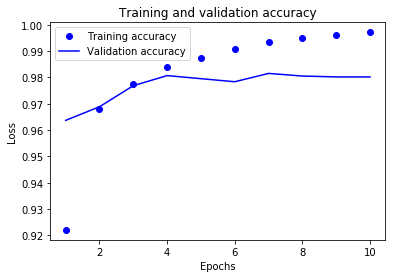

In [19]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit begins after 5 epochs

Retraining the model from scratch for 5 epochs to avoid overfit. Note that validation set is not used for this time

In [20]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_prepared, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2542 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.1048 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.0693 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0512 - acc: 0.9841
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0387 - acc: 0.9885


Model evaluation

In [21]:
final_loss, final_acc = model.evaluate(test_images_prepared, test_labels_one_hot)

10000/10000 [==============================] - 1s 62us/step


Final results

In [22]:
print('Final loss:', final_loss)
print('Final accuracy:', final_acc)

Final loss: 0.06657222250921187
Final accuracy: 0.9786


Generating predictions for two samples of numbers 4 and 9 from test images

First sample is a number 4 from test images

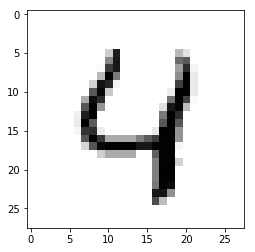

In [23]:
digit = test_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
test_labels[4]

4

In [25]:
prediction = model.predict(test_images_prepared[4:5], batch_size=784)
print(prediction)

[[3.1522703e-07 7.1998729e-10 6.7624178e-06 1.5347752e-07 9.9936396e-01
  8.8647923e-08 6.1360838e-06 1.9499708e-05 3.5314174e-06 5.9954374e-04]]


The highest likelihood is above 0.999 for number 4

Now it is time to predict a number 9 from test images

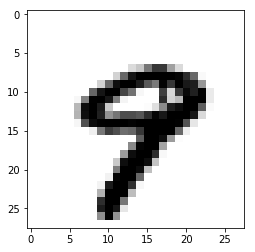

In [26]:
digit = test_images[9]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:
test_labels[9]

9

In [28]:
prediction = model.predict(test_images_prepared[9:10], batch_size=784)
print(prediction)

[[1.7110557e-12 4.4173969e-13 8.3259999e-10 1.1610584e-05 5.6213752e-04
  1.5935955e-09 3.9662598e-13 1.3114169e-04 4.6599569e-05 9.9924845e-01]]


The highest likelihood is above 0.999 for number 9